# Определение перспективного тарифа для телеком компании 

# Краткое описание проекта

***Цели проекта:***

- Используя даные 500 пользователей, провести анализ тарифов. 
- Определить каким тарифом пользуются, сколько звонков и сообщений отправили, откуда сам пользователь.
- На основе поведения клиентов определить какой тариф лучше и приносит больше денег компании.

**Описание тарифов**
- Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

***Имеющиеся данные:***

В нашем распоряжении есть данные 500 пользователей. Имеющийся датасет содержит в себе следующую информацию:

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Calls" data-toc-modified-id="Calls-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calls</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Messages" data-toc-modified-id="Messages-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Messages</a></span></li><li><span><a href="#Tariffs" data-toc-modified-id="Tariffs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Tariffs</a></span></li><li><span><a href="#Users" data-toc-modified-id="Users-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Users</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам</a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам</a></span></li><li><span><a href="#Объем-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Объем-израсходованного-интернет-трафика-по-месяцам-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объем израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Messages" data-toc-modified-id="Messages-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Messages</a></span></li><li><span><a href="#Minutes" data-toc-modified-id="Minutes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Minutes</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Profit" data-toc-modified-id="Profit-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Profit</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Гипотеза №2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выводы по проделанной работе

- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, при этом она не отличается по тому в каком городе находится пользователь.
- Суммарная выручка больше на Смарте, чем на Ультре (2.9млн против 2млн).
- Важно помнить, что клиентов Смарта в два раза больше в выборке и они постоянно выходят за лимиты. Если мы все же посмотрим на среднюю выручку, дисперсию и выручку на клиента, то заметим, что: средняя выручка с Ультры все же больше и стабильнее, она не так сильно варьируется, как у Смарта; выручка на 1 уникального клиента больше у Ультры.
- Выручка с Ультры стабильнее и более кучно собрана вокруг абонентки, клиенты находятся в рамках лимитов по сути, значит лояльность из-за переплат и нехватки услуг не портится. Помимо этого, учитывая что в нашей выборке клиентов Ультры в 2 раза меньше, они при этом генерируют почти соизмеримый суммарный доход. 

Таким образом, на мой взгляд оптимальнее увеличивать клиентскую базу Ультры, так как клиент данного тарифа прибыльнее. Еще я бы провела рокировку пользователей и прожорливых Смартовцев перевела на Ультру, а эконономных Ультравцев на Смарт.

## Изучение данных из файлов

In [1]:
!pip install plotly

***Импортируем необходимые библиотеки для работы:***

In [2]:
import numpy as np
import pandas as pd

import plotly
import plotly.express as px

from scipy import stats as st

### Calls

**Описание таблицы**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [3]:
# подстраховка. Иногда датасеты лежат сразу в корневике, а иногда лежат в папке datasets        
try:
    df_calls = pd.read_csv(r'C:\Users\Jager\calls.csv')
except:
    df_calls = pd.read_csv('calls.csv')

***Напишем функцию которая в дальнейшем для каждого датафрейма будет выводить основную информацию:***

In [4]:
def main_info(dataframe):
    display(dataframe.info())
    print('----------------')
    try:
        display(dataframe.sample(5))
    except:
        display(dataframe.head())
    print('----------------')
    print('Количество нулевых значений в строках') 
    display(dataframe.isnull().sum())
    print('----------------')
    display(dataframe.describe())
    print('----------------')
    print('Количество дубликатов = {}.'.format(dataframe.duplicated().sum()))

In [5]:
main_info(df_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

----------------


,id,call_date,duration,user_id
151250,1378_337,2018-04-15,2.43,1378
175632,1433_531,2018-05-28,4.46,1433
194506,1477_254,2018-10-17,8.09,1477
109465,1282_359,2018-07-28,15.12,1282
178727,1446_12,2018-08-31,14.22,1446


----------------
Количество нулевых значений в строках


id           0
call_date    0
duration     0
user_id      0
dtype: int64

----------------


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


----------------
Количество дубликатов = 0.


**Вывод:**

Пропущенных значений нет, однако call_date в неправильном виде, необходимо исправить на datetime. Также нужно исправить id на целочисленный вид. duration округлим в большоую сторону до целых.

### Internet

**Описание таблицы**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [6]:
try:
    df_internet = pd.read_csv(r'C:\Users\Jager\internet.csv')
except:
    df_internet = pd.read_csv('internet.csv')

In [7]:
main_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

----------------


,Unnamed: 0,id,mb_used,session_date,user_id
3476,3476,1011_343,366.39,2018-04-04,1011
49373,49373,1171_75,213.16,2018-03-23,1171
98487,98487,1331_11,486.60,2018-08-16,1331
13239,13239,1045_415,7.00,2018-09-26,1045
4634,4634,1014_240,0.00,2018-08-04,1014


----------------
Количество нулевых значений в строках


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

----------------


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


----------------
Количество дубликатов = 0.


**Вывод:**

Пропущенных значений нет, однако Unnamed довольно-таки странный столбец. Выглядит так, будто бы он дублирует столбец с индексом. В дальнейшем надо будет проверить одинаковы ли эти два столбца и, в случае если это подтвердится, удалить. 
mb_used округлим, так как нам привычнее видеть мегабайты в целочисленном виде.
Также необходимо исправить session_date на правильный формат.
Также нужно исправить id на целочисленный вид.

### Messages

**Описание таблицы**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [8]:
try:
    df_messages = pd.read_csv(r'C:\Users\Jager\messages.csv')
except:
    df_messages = pd.read_csv('messages.csv')

In [9]:
main_info(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

----------------


,id,message_date,user_id
80904,1338_102,2018-09-18,1338
106673,1431_415,2018-03-27,1431
91707,1379_393,2018-10-25,1379
18564,1082_5,2018-10-28,1082
84352,1353_189,2018-11-21,1353


----------------
Количество нулевых значений в строках


id              0
message_date    0
user_id         0
dtype: int64

----------------


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


----------------
Количество дубликатов = 0.


**Вывод:**

Пропущенных значений нет, однако формат message_date и id необходимо исправить.

### Tariffs

**Описание таблицы**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
try:
    df_tariffs = pd.read_csv(r'C:\Users\Jager\tariffs.csv')
except:
    df_tariffs = pd.read_csv('tariffs.csv')

df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

In [11]:
main_info(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

----------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


----------------
Количество нулевых значений в строках


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff                   0
dtype: int64

----------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


----------------
Количество дубликатов = 0.


**Вывод:**

Пропущенных значений нет, все данные правильного формата.

### Users

**Описание таблицы**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [12]:
try:
    df_users = pd.read_csv(r'C:\Users\Jager\users.csv')
except:
    df_users = pd.read_csv('users.csv')

In [13]:
main_info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

----------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
234,1234,54,NaN,Магнитогорск,Роксана,Алексеева,2018-12-19,ultra
430,1430,22,NaN,Тверь,Андрей,Авроров,2018-04-23,ultra
449,1449,55,NaN,Москва,Дана,Новикова,2018-07-16,smart
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
287,1287,39,NaN,Севастополь,Вениамин,Мишин,2018-09-23,smart


----------------
Количество нулевых значений в строках


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

----------------


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


----------------
Количество дубликатов = 0.


**Вывод:**

Есть пропущенные значения в churn_date, исходя из задания если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому эти пропущенные значения не будем брать в расчет и оставим пустыми. Помимо этого одназначно необходимо изменить формат данной таблицы.
Также reg_date имеет неправильный формат, нужно заменить на datetime. 
Лучшим вариантом будет привести к нижнему регистру столбцы с названиями городов, имена и фамилии. Помимо этого на всякий случай просмотрим уникальные значения в городах чтобы в дальнейшем определить была ли сделана ошибка при заполнении и нужна ли будет лемматизация.

In [14]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

**Вывод:**

Все города записаны верно, потворений, либо двояких названий нет. А значит лемматизация не нужна.

## Предобработка данных

- Начнем с обработки данных о звонках.

In [15]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
df_calls['id'] = df_calls['id'].astype('int')

- Посчитаем процентное соотношение пропусков в минутах:

In [16]:
ratio_calls = 100*df_calls[df_calls['duration'] == 0.0].count()[0]/ len(df_calls['duration'])
ret = round(float(ratio_calls), 2)
ret

19.55

***Вывод:***

Получается 19.55% нулевых значений в минутах. Склоняюсь что это ошибка при заполнении данных. Необходимо помнить что точную природу определить самим сложно, лучше обратиться к тем кто занимался базой. Как вариант, это могут быть неотвеченные звонки или нечто другое. Заменю 0 на 1, так как в дальнейшем дополнительная плата сверх абонетской насчитывается за 1 минуту разговора и данная замена будет незначительной.

In [17]:
df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1

In [18]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')

- Следующие по списку данные по интернету.

In [19]:
df_internet['id'] = df_internet['id'].astype('int')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

- Тут тоже скорее всего техническая ошибка при автоматическом заполнении. Проделаем здесь то же самое что и с минутами. Для начала вычислим процент нулевых значений:

In [20]:
ratio_internet = 100*df_internet[df_internet['mb_used'] == 0.0].count()[0]/ len(df_internet['mb_used'])
ret_2 = round(float(ratio_internet), 2)
ret_2

13.12

- 13.12% нулевых значений! Точно техническая ошибка. Заменим 0 на 1 мб, чтобы не потерять остальные данные, но и не исказить выборку.

In [21]:
df_internet.loc[df_internet['mb_used'] == 0, 'mb_used'] = 1

In [22]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype('int')

- Теперь обработаем данные о сообщениях.

In [23]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
df_messages['id'] = df_messages['id'].astype('int')

- Далее обрабатываем данные о пользователях.

In [24]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
df_users['city'] = df_users['city'].str.lower()
df_users['first_name'] = df_users['first_name'].str.lower()
df_users['last_name'] = df_users['last_name'].str.lower()

### Количество сделанных звонков и израсходованных минут разговора по месяцам

- Для начала создадим отдельный столбец с месяцами.

In [25]:
df_calls['month'] = df_calls['call_date'].dt.month

In [26]:
all_calls = df_calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count', 'sum']).reset_index()
all_calls.columns = ['month', 'user_id', 'calls', 'minutes']
all_calls

,month,user_id,calls,minutes
0,1,1005,15,99
1,1,1032,61,397
2,1,1045,1,9
3,1,1055,64,568
4,1,1071,24,200
...,...,...,...,...
3169,12,1494,62,426
3170,12,1495,155,1066
3171,12,1496,80,533
3172,12,1497,71,558


### Количество отправленных сообщений по месяцам

In [27]:
df_messages['month'] = df_messages['message_date'].dt.month

In [28]:
all_messages = df_messages.pivot_table(index=['month', 'user_id'], values='id', aggfunc='count').reset_index().rename(columns={'id': 'messages'})
all_messages

,month,user_id,messages
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16
...,...,...,...
2712,12,1493,78
2713,12,1495,84
2714,12,1496,51
2715,12,1497,17


### Объем израсходованного интернет-трафика по месяцам

In [29]:
df_internet['month'] = df_internet['session_date'].dt.month

In [30]:
all_internet = df_internet.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum').reset_index()
all_internet

,month,user_id,mb_used
0,1,1005,2730
1,1,1032,24158
2,1,1045,2348
3,1,1055,17115
4,1,1071,15625
...,...,...,...
3198,12,1494,17650
3199,12,1495,23451
3200,12,1496,20770
3201,12,1497,19946


### Помесячная выручка с каждого пользователя

- Объединим несколько таблиц all_calls, all_messages, all_internet и df_users.
Оптимальнее к общей сводной подтягивать информацию по юзерам через left соединение, поэтому df_users присоединим не через outer, а через left.

In [31]:
merge = (all_calls.merge(all_messages, on=['user_id', 'month'], how='outer')
           .merge(all_internet, on=['month', 'user_id'], how='outer')
           .merge(df_users, on='user_id', how='left'))
merge.sample(5)

,month,user_id,calls,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
1745,9,1363,122.0,837.0,NaN,17155.0,69,NaT,нижний тагил,оксана,болдырева,2018-03-04,ultra
473,5,1158,61.0,397.0,72.0,12024.0,45,NaT,новокузнецк,игорь,андрейчук,2018-02-03,smart
1220,8,1116,44.0,314.0,NaN,15067.0,65,NaT,петрозаводск,альберта,шевцова,2018-04-17,smart
54,2,1120,27.0,167.0,NaN,4214.0,25,NaT,краснодар,агнесса,абдулина,2018-01-24,ultra
1949,10,1123,89.0,610.0,17.0,18280.0,74,NaT,краснодар,вениамин,устинов,2018-03-18,smart


- Теперь посчитаем количество пропущенных значений в новой объединенной таблице.

In [32]:
merge.isnull().sum()

month            0
user_id          0
calls           40
minutes         40
messages       497
mb_used         11
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

- Держим в уме что столбец с churn_date можем заменить на 0 согласно условию что на момент сбора данных тариф еще действовал. 
Согласно пропущенным значениям видно, что в пропущены данные в количестве сделанных звонков и израсходованных минут разговора + количество сообщений + объём потраченного за сессию интернет-трафика (в мегабайтах).

- Вполне возможно что пользователи попросту не использовали в какое-то время(месяц) данные услуги. Это возможно, к примеру, если пользователь был в отпуске за границей и ему попросту не было необходимости использовать какие-либо услуги в этот период.

- Заменим пропущенные значения в таком случае нулями.

In [33]:
merge = merge.fillna(0)

- Помимо этого, так как при объединении таблиц были пропущенные значения, изменились данные с типа int на float в некоторых столбцах. Исправим это досадное недоразумение.

In [34]:
merge['calls'] = merge['calls'].astype('int')
merge['minutes'] = merge['minutes'].astype('int')
merge['messages'] = merge['messages'].astype('int')
merge['mb_used'] = merge['mb_used'].astype('int')
merge['month'] = merge['month'].astype('int')

- К общей таблице подтянем информацию по ценам из датафрейма тарифов, чтобы в дальнейшем упростить функцию подсчета выручки:

In [35]:
merge = merge.merge(df_tariffs, on='tariff', how='left')
pd.set_option('display.max_columns', None)
merge.sample(5)

,month,user_id,calls,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
685,6,1146,75,542,92,14760,72,0,санкт-петербург,владислав,никонов,2018-05-25,smart,50,15360,500,550,200,3,3
2812,12,1116,57,431,0,15615,65,0,петрозаводск,альберта,шевцова,2018-04-17,smart,50,15360,500,550,200,3,3
1171,8,1045,34,229,63,23064,48,0,улан-удэ,джемма,карасева,2018-01-30,smart,50,15360,500,550,200,3,3
2425,11,1187,53,407,63,17016,60,0,рязань,виталий,овчинников,2018-08-22,smart,50,15360,500,550,200,3,3
2099,10,1309,69,466,82,19336,28,0,казань,юлия,касьянова,2018-10-05,ultra,1000,30720,3000,1950,150,1,1


- Изменим данные по интернету и переведем мегабайты в гигабайты, округлив остаток в большую сторону. + Переименуем столбец на гигабайты.

In [36]:
def gb(number):
    gb_used = number / 1024
    return gb_used
        
merge['mb_used'] = merge['mb_used'].apply(gb).apply(np.ceil).astype('int')
merge['mb_per_month_included'] = merge['mb_per_month_included'].apply(gb).astype('int')
merge = merge.rename(columns={'mb_used':'internet', 'mb_per_month_included':'internet_included'})

- Создадим функцию для подсчета выручки

In [37]:
def profit(row):
    minutes = row['minutes']
    messages = row['messages']
    internet = row['internet']
    tariff = row['tariff']
    minutes_included = row['minutes_included']
    messages_included = row['messages_included']
    internet_included = row['internet_included']
    rub_monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    
    profit_minutes = 0
    profit_messages = 0
    profit_internet = 0
    
    if tariff == 'ultra':
        if minutes > minutes_included:
            profit_minutes = (minutes - minutes_included)*rub_per_minute
        if messages > messages_included:
            profit_messages = (messages - messages_included)*rub_per_message
        if internet > internet_included:
            profit_internet = (internet - internet_included)*rub_per_gb
        return profit_minutes + profit_messages + profit_internet + rub_monthly_fee

    if tariff == 'smart':
        if minutes > minutes_included:
            profit_minutes = (minutes - minutes_included)*rub_per_minute
        if messages > messages_included:
            profit_messages = (messages - messages_included)*rub_per_message
        if internet > internet_included:
            profit_internet = (internet - internet_included)*rub_per_gb
        return profit_minutes + profit_messages + profit_internet + rub_monthly_fee

In [38]:
merge['profit'] = merge.apply(profit, axis=1).astype('int')
merge.sample(5)

,month,user_id,calls,minutes,messages,internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,internet_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
2330,11,1079,78,579,33,8,20,0,москва,еремей,авроров,2018-05-15,smart,50,15,500,550,200,3,3,787
1430,8,1425,78,542,72,14,51,0,пермь,вадим,фомин,2018-02-27,smart,50,15,500,550,200,3,3,742
1150,8,1010,19,145,0,15,26,0,тюмень,эдуард,кононов,2018-08-05,smart,50,15,500,550,200,3,3,550
1301,8,1244,71,530,98,20,68,0,москва,геральд,макеев,2018-05-09,smart,50,15,500,550,200,3,3,1784
433,5,1064,56,443,39,25,55,2018-12-26 00:00:00,якутск,динара,алфеева,2018-03-17,smart,50,15,500,550,200,3,3,2550


- На всякий случай проверим есть ли пропущенные значения, так как могло получится так что потраченные минуты, сообщения и интернет не превышали тарифного плана.

In [39]:
merge.isnull().sum()

month                0
user_id              0
calls                0
minutes              0
messages             0
internet             0
age                  0
churn_date           0
city                 0
first_name           0
last_name            0
reg_date             0
tariff               0
messages_included    0
internet_included    0
minutes_included     0
rub_monthly_fee      0
rub_per_gb           0
rub_per_message      0
rub_per_minute       0
profit               0
dtype: int64

- Пропущенных значений нет, тип данных приведен к правильному + посчитана помесячная выручка с каждого пользователя. Время переходить к следующему шагу.

## Анализ данных

- Создадим таблицу по тарифу smart с информацией сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа smart в месяц

In [40]:
merge_smart = merge.query('tariff=="smart"').pivot_table(index = ['tariff', 'month'], values=['minutes', 'messages', 'internet', 'profit'], aggfunc = 'sum').reset_index()
merge_smart

,tariff,month,internet,messages,minutes,profit
0,smart,1,297,620,7128,24594
1,smart,2,688,1397,17766,48433
2,smart,3,1174,2453,30841,90750
3,smart,4,1528,3443,42224,109186
4,smart,5,2249,4762,56175,171894
5,smart,6,2622,5478,66699,200760
6,smart,7,3200,6784,84277,250541
7,smart,8,3945,7905,101800,316539
8,smart,9,4272,8746,114421,331370
9,smart,10,4975,9927,128859,408317


- Создадим таблицу по тарифу ultra с информацией сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям тарифа ultra в месяц

In [41]:
merge_ultra = merge.query('tariff=="ultra"').pivot_table(index = ['tariff', 'month'], values=['minutes', 'messages', 'internet', 'profit'], aggfunc = 'sum').reset_index()
merge_ultra

,tariff,month,internet,messages,minutes,profit
0,ultra,1,120,304,3968,17550
1,ultra,2,288,527,7312,47400
2,ultra,3,655,1195,18614,74550
3,ultra,4,935,1736,25854,110100
4,ultra,5,1303,2536,35166,138150
5,ultra,6,1593,3505,41364,171450
6,ultra,7,1869,4536,50987,193050
7,ultra,8,2101,5183,56129,222900
8,ultra,9,2214,6013,63669,232800
9,ultra,10,2471,7187,70458,254250


- Теперь посчитаем среднее количество, дисперсию и стандартное отклонение по минутам, интернету и сообщениям. 

In [42]:
new_df = merge.pivot_table(index = 'tariff', values = ['minutes', 'messages', 'internet'], aggfunc = ['mean', 'var', 'std'])
new_df

mean                               var               \
         internet   messages     minutes   internet     messages   
tariff                                                             
smart   16.365635  33.384029  429.450875  33.192553   796.812958   
ultra   19.528934  49.363452  540.779695  97.273806  2285.266143   

                            std                         
              minutes  internet   messages     minutes  
tariff                                                  
smart    37974.774628  5.761298  28.227876  194.871174  
ultra   106105.726823  9.862748  47.804457  325.738740

- Наблюдаем, что среднее потребление, как и вариативность поведения больше у клиентов Ультры

### Messages

- Напишем функцию для отображения графиков обоих тарифов в сообщениях, минутах, интернете и выручке:

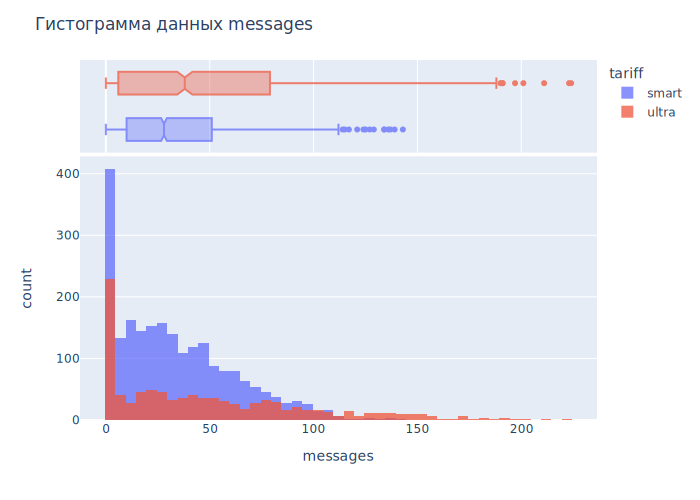

Среднее значение тарифа smart = 33.4
Стандартное отклонение тарифа smart = 28.2
Среднее значение тарифа ultra = 49.4
Стандартное отклонение тарифа ultra = 47.8


In [43]:
def function(row):
    fig = px.histogram(merge, x= row, color='tariff', marginal = 'box')
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.75)
    fig.update_layout(title="Гистограмма данных {}".format(row))
    fig.show('svg')
    
    for i in merge['tariff'].unique():
        mean = round(np.mean(merge[merge['tariff'] == i][row]), 1)
        std = round(np.std(merge[merge['tariff'] == i][row]), 1)
        print('Среднее значение тарифа {} = {}'.format(i, mean))
        print('Стандартное отклонение тарифа {} = {}'.format(i, std))
    
    
function('messages')

***Вывод:***

У обоих тарифов в сообщениях наблюдается положительная скошенность.
Около 4 сообщений наиболее часто отправляют пользователи тарифа Смарт и Ультра. Оно ожидаемо, так как в нынешних реалиях все больше и больше людей предпочитают использовать мессенджеры для общения.
Также следует отметить что абоненты Ультры сильно не добирают до лимита смс (1000), тогда как Смарт (50) выходит за рамки.

Ус тарифа Смарт расположен на отметке 112 сообщений (бесплатный лимит 50), в то время как ус Ультра достигает 188 сообщений (бесплатный лимит 1000). 

Таким образом наиболее выгодным для компании будет тариф Смарт в плане сообщений, в то время как тариф Ультра работает на нас в убыток по сообщениям.
Следовательно оптимальным решением было бы устанновить для тарифа Ультра: 49(среднее) + (по правилу 3х сигм) 48 (стд отклонение) * 3 = 193 сообщения
А для тарифа Смарт: 33 + 28 * 3 = 117 сообщений. 

### Minutes

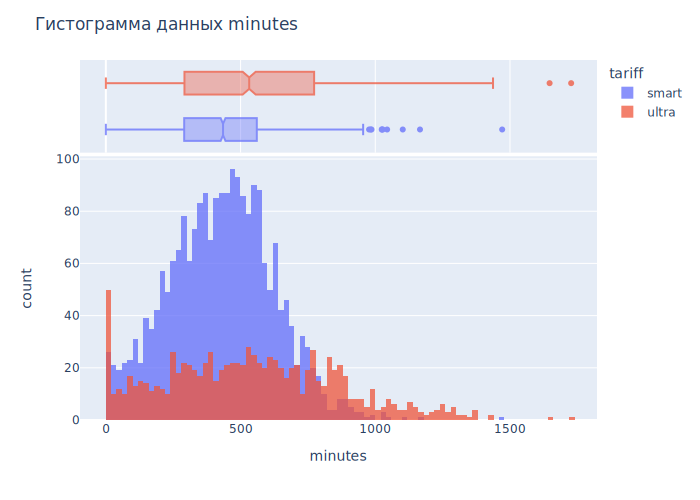

Среднее значение тарифа smart = 429.5
Стандартное отклонение тарифа smart = 194.8
Среднее значение тарифа ultra = 540.8
Стандартное отклонение тарифа ultra = 325.6


In [44]:
function('minutes')

***Вывод:***

В среднем больше всего пользователи тарифа Ультра тратят около 540 минут на общение, а пользователи тарифа Смарт меньше - около 429 минут. По графику мы видим, что Ультра (3000) также находится в рамках лимита, Смарт (500) явно выходит.

Ус тарифа Смарт расположен на отметке около 955 минут (бесплатный лимит 500), в то время как ус Ультра достигает 1437 сообщений (бесплатный лимит 3000). Таким образом наиболее выгодным для компании будет тариф Смарт в плане минут, в то время как тариф Ультра работает на нас в убыток по минутам (мы предоставляем пользователям гораздо больше, нежели чем они тратят).
Следовательно оптимальным решением было бы устанновить для тарифа Ультра: 540(среднее) + (по правилу 3х сигм) 326 (стд отклонение) * 3 = 1518 минут.
А для тарифа Смарт: 430 + 195 * 3 = 1015 минут. 

### Internet

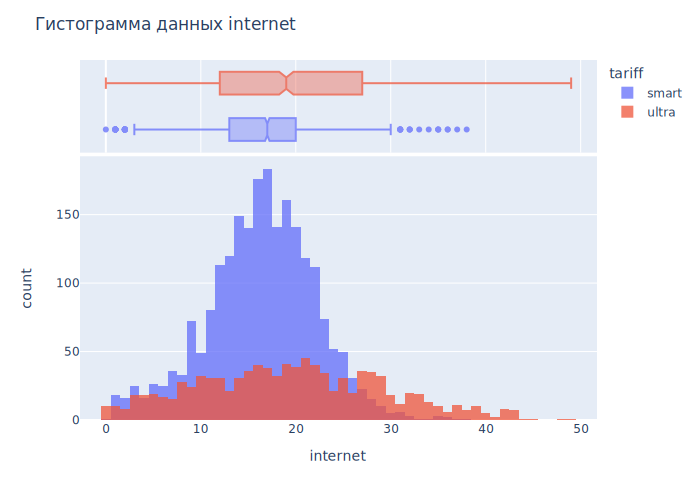

Среднее значение тарифа smart = 16.4
Стандартное отклонение тарифа smart = 5.8
Среднее значение тарифа ultra = 19.5
Стандартное отклонение тарифа ultra = 9.9


In [45]:
function('internet')

***Вывод:***

Несомненным лидером по использованию является интернет, так как при помощи интернета людии посылают друг другу сообщения и звонят. Пользователи тарифа Ультра тратят в среднем 19 Гб, а пользователи тарифа Смарт около 16 Гб.
На этот раз мы видим, что Ультра (30) также выходит за лимит, но Смарт (15) это делает куда ощутимее, так как даже среднее по нему больше лимита интернета.

Ус тарифа Смарт расположен на отметке около 30 гб (бесплатный лимит 15), в то время как ус Ультра достигает 49 гб (бесплатный лимит 30). Здесь выгода для компании приблизительно одинакова.
Оптимальным решением было бы устанновить для тарифа Ультра: 20(среднее) + (по правилу 3х сигм) 10 (стд отклонение) * 3 = 50 Гб.
А для тарифа Смарт: 16 + 6 * 3 = 34 Гб. 

### Profit

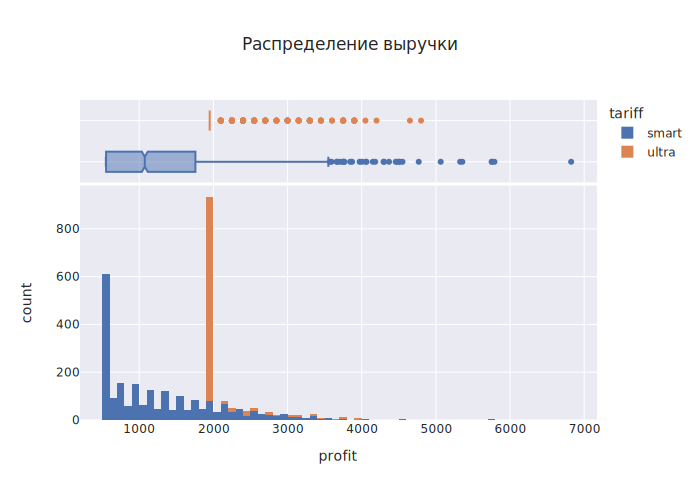

In [46]:
fig = px.histogram(merge, x = 'profit', color = 'tariff', template = 'seaborn', marginal = 'box', title = 'Распределение выручки')
fig.show('svg')

***Вывод:***

Мы видим, что из-за постоянного перерасхода распределение выручки Смарта имеет сильный правый скос, тогда как распределение выручки Ультра более кучно собрано вокруг абонентки.

- Теперь посмотрим дисперсию и стандартное отклонение в выручке по тарифам.

In [47]:
new_profit = merge.pivot_table(index = 'tariff', values = 'profit', aggfunc = ['var', 'std']).reset_index(drop=False)
new_profit.columns = ['tariff', 'var', 'std']
new_profit

,tariff,var,std
0,smart,690458.161989,830.938122
1,ultra,143491.240560,378.802377


- Исходя из показателя дисперсии, мы видим, что выручка со Смарта куда сильнее разбросана, т.е. менее стабильна и куда более вариативна.

- Посчитаем общую выручку и какая ее часть приходится на одного уникального пользователя.

In [48]:
pivot_revenue = merge.pivot_table(index = 'tariff', values = ['profit', 'user_id'], aggfunc = {'profit': np.sum, 'user_id': lambda x: x.nunique()})
pivot_revenue.columns = ['sum_revenue', 'unique_users']
pivot_revenue['revenue_per_user'] = pivot_revenue['sum_revenue'] // pivot_revenue['unique_users']
display(pivot_revenue)

,sum_revenue,unique_users,revenue_per_user
tariff,,,
smart,2925590,350,8358
ultra,2040000,148,13783


- Как видим, на 1 уникального пользователя Ультры приходится куда больше выручки.

**Вывод**

Отталкиваясь от сравнительных гистограмм и диаграмм размаха, можно сделать следующие выводы:
- пользователи тарифа Ультра не тратят сообщений и минут больше своего тарифа. Как и предполагалось, больше всего пользователи используют Интернет. Лучшим решением было бы снизить бесплатный лимит сообщений и минут до рекомендованного мною выше.
- в соответсвии с гистограммами можно сделать вывод что пользователи тарифа Ультра тратят свой тариф более плавно, так как не боятся выйти за пределы тарифа. В то же время пользователи тарифа Смарт тратят меньше мобильной связи, вполне ожидаемо опасаясь выйти за порог тарифа.

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

### Гипотеза №1

Для начала сформулируем двустороннюю гипотезу:

H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается. (H₀ всегда формулируется так, чтобы использовать знак равенства)

H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [49]:
profit_1 = merge[merge['tariff'] == 'ultra']['profit']
profit_2 = merge[merge['tariff'] == 'smart']['profit']
alpha = 0.05
results = st.ttest_ind(profit_1, profit_2, equal_var=False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаю нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2496710269965528e-233
Отвергаю нулевую гипотезу


**Вывод** - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

### Гипотеза №2

Теперь сформулируем двустороннюю гипотезу для другой теории: 

H₀ - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. (H₀ всегда формулируется так, чтобы использовать знак равенства)

H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [50]:
profit_1 = merge[merge['city'] == 'москва']['profit']
profit_2 = merge[merge['city'] != 'москва']['profit']
alpha = 0.05
results = st.ttest_ind(profit_1, profit_2, equal_var=False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаю нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.560259602740345
Не получилось отвергнуть нулевую гипотезу


**Вывод** - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, при этом она не отличается по тому в каком городе находится пользователь.
- Суммарная выручка больше на Смарте, чем на Ультре (2.9млн против 2млн).
- Важно помнить, что клиентов Смарта в два раза больше в выборке и они постоянно выходят за лимиты. Если мы все же посмотрим на среднюю выручку, дисперсию и выручку на клиента, то заметим, что: средняя выручка с Ультры все же больше и стабильнее, она не так сильно варьируется, как у Смарта; выручка на 1 уникального клиента больше у Ультры.
- Выручка с Ультры стабильнее и более кучно собрана вокруг абонентки, клиенты находятся в рамках лимитов по сути, значит лояльность из-за переплат и нехватки услуг не портится. Помимо этого, учитывая что в нашей выборке клиентов Ультры в 2 раза меньше, они при этом генерируют почти соизмеримый суммарный доход. 

Таким образом, на мой взгляд оптимальнее увеличивать клиентскую базу Ультры, так как клиент данного тарифа прибыльнее. Еще я бы провела рокировку пользователей и прожорливых Смартовцем перевела на Ультру, а эконономных Ультравцев на Смарт.